# Outline

## 1. Data Cleaning
## 2. Data Exploration
## 3. Feature Engineering
## 4. Data Preprocessing
## 5. Model Building

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
import random
%matplotlib inline

### Data Cleaning

In [2]:
data = pd.read_csv('owid-covid-data.csv')
data.dropna(subset=['iso_code'],inplace=True)
pd.set_option("max_rows",10)

In [3]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'total_vaccinations_per_hundred', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'ag

In [4]:
newData = data[['iso_code','continent','location',
                'population','human_development_index','gdp_per_capita',
                'date','total_cases','total_deaths',
                'new_cases','new_deaths','new_cases_smoothed',
                'new_deaths_smoothed','total_cases_per_million','total_deaths_per_million',
                'new_cases_per_million','new_deaths_per_million','new_cases_smoothed_per_million',
                'new_deaths_smoothed_per_million','diabetes_prevalence','cardiovasc_death_rate',
                'median_age','handwashing_facilities','hospital_beds_per_thousand',
                'life_expectancy','stringency_index','total_tests',
                'new_tests','total_tests_per_thousand','new_tests_per_thousand',
                'new_tests_smoothed','new_tests_smoothed_per_thousand','tests_per_case',
                'extreme_poverty']]

newData['id'] = range(1,len(newData)+1)
cols = newData.columns.tolist()
cols = cols[-1:] + cols[:-1]
newData = newData[cols]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
newData

,id,iso_code,continent,location,population,human_development_index,gdp_per_capita,date,total_cases,total_deaths,...,life_expectancy,stringency_index,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,extreme_poverty
0,1,AFG,Asia,Afghanistan,38928341.0,0.498,1803.987,2020-02-24,1.0,NaN,...,64.83,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,AFG,Asia,Afghanistan,38928341.0,0.498,1803.987,2020-02-25,1.0,NaN,...,64.83,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,AFG,Asia,Afghanistan,38928341.0,0.498,1803.987,2020-02-26,1.0,NaN,...,64.83,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,AFG,Asia,Afghanistan,38928341.0,0.498,1803.987,2020-02-27,1.0,NaN,...,64.83,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,AFG,Asia,Afghanistan,38928341.0,0.498,1803.987,2020-02-28,1.0,NaN,...,64.83,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55507,55189,ZWE,Africa,Zimbabwe,14862927.0,0.535,1899.775,2020-12-17,11866.0,314.0,...,61.49,67.59,193011.0,1959.0,12.986,0.132,1356.0,0.091,12.1,21.4
55508,55190,ZWE,Africa,Zimbabwe,14862927.0,0.535,1899.775,2020-12-18,12047.0,316.0,...,61.49,69.44,195166.0,2155.0,13.131,0.145,1457.0,0.098,11.5,21.4
55509,55191,ZWE,Africa,Zimbabwe,14862927.0,0.535,1899.775,2020-12-19,12151.0,318.0,...,61.49,69.44,196747.0,1581.0,13.237,0.106,1488.0,0.100,11.2,21.4
55510,55192,ZWE,Africa,Zimbabwe,14862927.0,0.535,1899.775,2020-12-20,12325.0,320.0,...,61.49,69.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.4


In [6]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55193 entries, 0 to 55511
Data columns (total 35 columns):
id                                 55193 non-null int64
iso_code                           55193 non-null object
continent                          54858 non-null object
location                           55193 non-null object
population                         55193 non-null float64
human_development_index            53066 non-null float64
gdp_per_capita                     52835 non-null float64
date                               55193 non-null object
total_cases                        54633 non-null float64
total_deaths                       46526 non-null float64
new_cases                          54627 non-null float64
new_deaths                         46525 non-null float64
new_cases_smoothed                 53676 non-null float64
new_deaths_smoothed                53676 non-null float64
total_cases_per_million            54633 non-null float64
total_deaths_per_million   

In [7]:
cat = []
num = newData.describe().columns
for i in newData.columns:
    if i not in num:
        cat.append(i)

In [8]:
pd.set_option('max_rows',10)
num.T

Index(['id', 'population', 'human_development_index', 'gdp_per_capita',
       'total_cases', 'total_deaths', 'new_cases', 'new_deaths',
       'new_cases_smoothed', 'new_deaths_smoothed', 'total_cases_per_million',
       'total_deaths_per_million', 'new_cases_per_million',
       'new_deaths_per_million', 'new_cases_smoothed_per_million',
       'new_deaths_smoothed_per_million', 'diabetes_prevalence',
       'cardiovasc_death_rate', 'median_age', 'handwashing_facilities',
       'hospital_beds_per_thousand', 'life_expectancy', 'stringency_index',
       'total_tests', 'new_tests', 'total_tests_per_thousand',
       'new_tests_per_thousand', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'tests_per_case', 'extreme_poverty'],
      dtype='object')

In [9]:
iso = []
for i in newData['location'].value_counts().index:
    iso.append(i)
print(iso)

['Mexico', 'Thailand', 'Taiwan', 'South Korea', 'Japan', 'United States', 'China', 'World', 'Singapore', 'Vietnam', 'France', 'Switzerland', 'Nepal', 'Malaysia', 'Israel', 'Australia', 'Canada', 'Denmark', 'Czechia', 'Sri Lanka', 'Germany', 'Cambodia', 'United Arab Emirates', 'Finland', 'India', 'Fiji', 'Philippines', 'United Kingdom', 'Italy', 'Russia', 'Spain', 'Sweden', 'Argentina', 'Belgium', 'Malta', 'South Africa', 'Morocco', 'Egypt', 'Guatemala', 'Iran', 'Lebanon', 'Greece', 'Netherlands', 'Chile', 'Luxembourg', 'Iraq', 'Kuwait', 'Oman', 'Afghanistan', 'Bahrain', 'Norway', 'Pakistan', 'Latvia', 'Austria', 'Algeria', 'Croatia', 'Portugal', 'Estonia', 'North Macedonia', 'Georgia', 'Serbia', 'Romania', 'Brazil', 'Iceland', 'San Marino', 'Lithuania', 'New Zealand', 'Senegal', 'Belarus', 'Nigeria', 'Qatar', 'Ireland', 'Monaco', 'Armenia', 'Dominican Republic', 'Azerbaijan', 'Ecuador', 'Saudi Arabia', 'Andorra', 'Indonesia', 'Hungary', 'Ukraine', 'Jordan', 'Bangladesh', 'Tunisia', 'Li

In [10]:
# Spitting data into testing and training.
training = pd.DataFrame()
testing = pd.DataFrame()

# Split 20% for each location in the data.
for i in newData['location'].value_counts().index:
    train, test = train_test_split(newData[newData['location']==i], test_size=0.2, shuffle=False)
    training = pd.concat([training,train])
    testing = pd.concat([testing,test])


In [11]:
training['train_data'] = 1
testing['train_data'] = 0
newData = pd.concat([training,testing])

### Data Exploration & Visualization

In [ ]:
training

In [ ]:
training.info()

In [ ]:
training.describe()

In [ ]:
training.describe().columns

In [ ]:
df_cat = training[['iso_code','continent','location','date']]
df_num = training[['population', 'human_development_index', 'gdp_per_capita',
       'total_cases', 'total_deaths', 'new_cases', 'new_deaths',
       'new_cases_smoothed', 'new_deaths_smoothed', 'total_cases_per_million',
       'total_deaths_per_million', 'new_cases_per_million',
       'new_deaths_per_million', 'new_cases_smoothed_per_million',
       'new_deaths_smoothed_per_million', 'diabetes_prevalence',
       'cardiovasc_death_rate', 'median_age', 'handwashing_facilities',
       'hospital_beds_per_thousand', 'life_expectancy', 'stringency_index',
       'total_tests', 'new_tests', 'total_tests_per_thousand',
       'new_tests_per_thousand', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'tests_per_case', 'extreme_poverty']]

In [ ]:
colors = ['red','orange','blue','green','yellow','purple','darkblue','pink','lightblue']

In [ ]:
for i in df_num:
    plt.hist(df_num[i],range=(df_num[i].min(),df_num[i].max()),color=colors[random.randrange(0,len(colors)-1)])
    plt.title("Histogram of "+i)
    plt.ylabel('Frequency of Occurrence')
    plt.xlabel(i)
    plt.show()

In [ ]:
for i in df_num:
    df_num[i].value_counts().plot(kind='bar')
    plt.title("Bar Chart of "+i)
    plt.ylabel('Frequency of Occurrence')
    plt.xlabel(i)
    sns.despine
    break

In [ ]:
print(df_num.corr())

In [ ]:
sns.heatmap(df_num.corr())

In [ ]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index , df_cat[i].value_counts()).set_title(i)
    plt.show()

In [24]:
for i in newData['location'].value_counts().index:
    y_axis = newData[newData['location']== i]['new_deaths_smoothed']
    x_axis = newData[newData['location']== i]['date']
    plt.plot(x_axis,y_axis,color=colors[random.randrange(0,len(colors)-1)])
    plt.title("Graph of the number of death in "+i)
    plt.ylabel('New Deaths')
    plt.xlabel('Date')
    plt.show()

NameError: name 'colors' is not defined

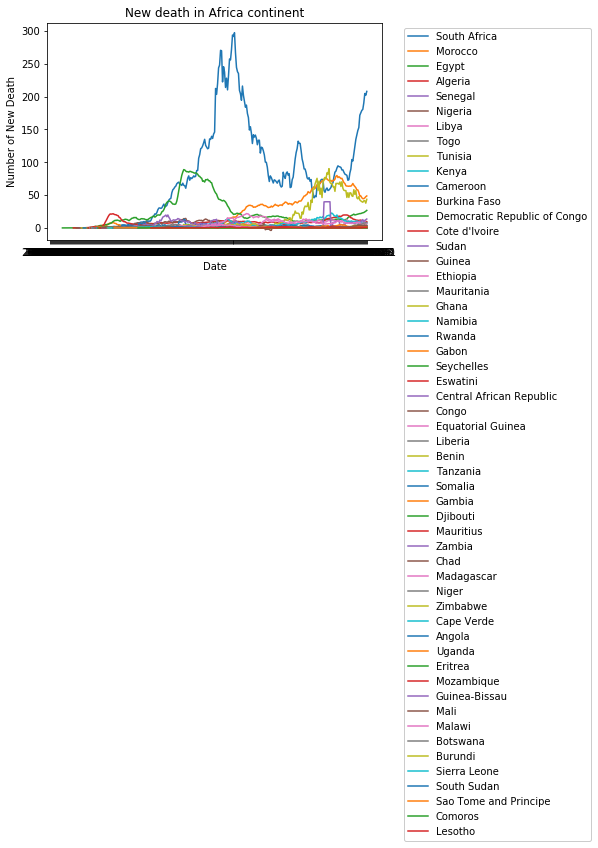

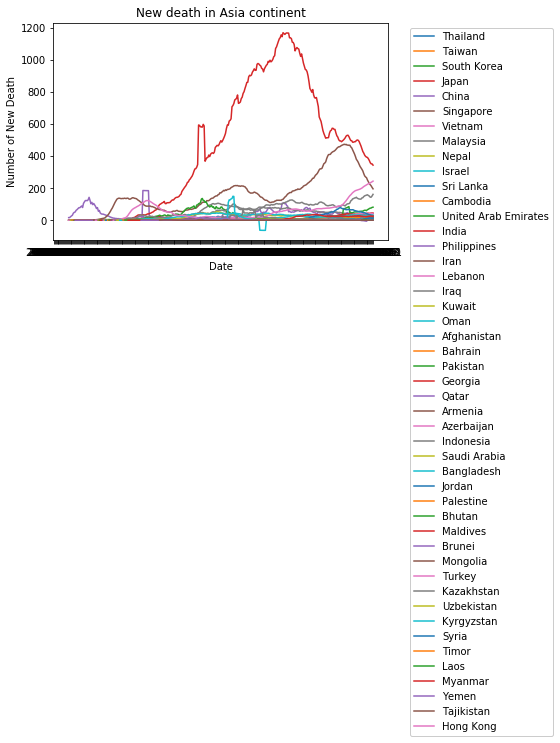

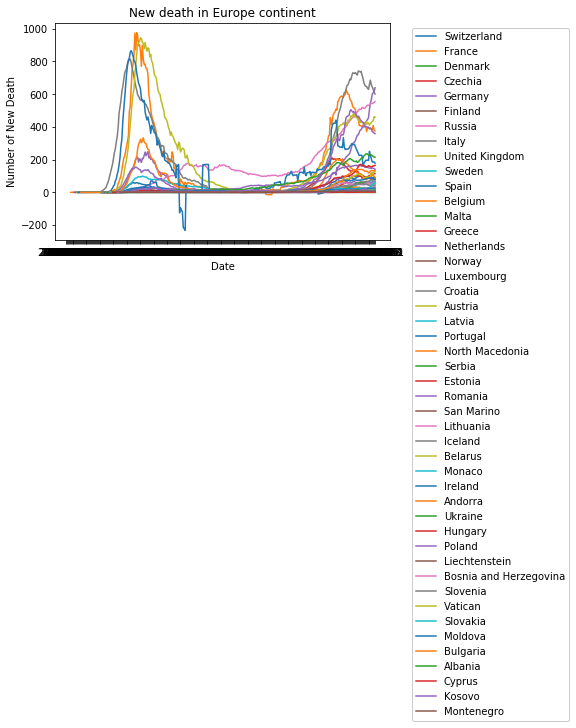

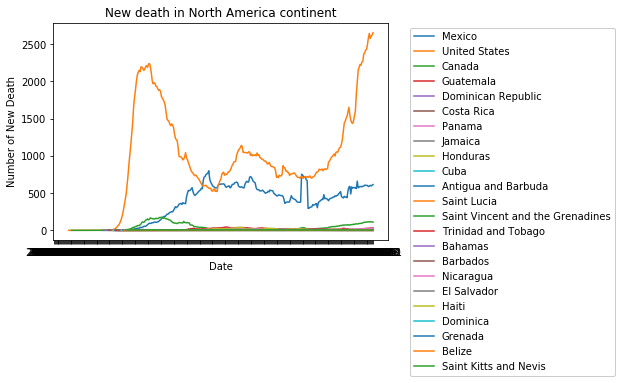

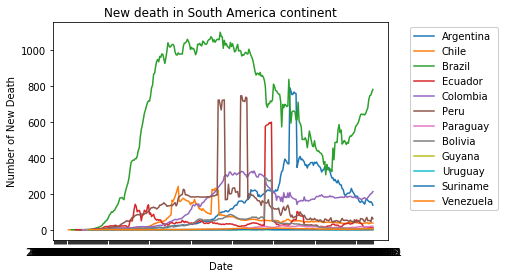

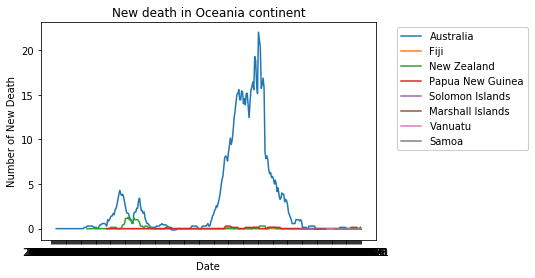

In [25]:
countries = ["Indonesia","Singapore,","China"]
for i in newData['continent'].value_counts().index:
    for j in newData[newData['continent']==i]['location'].value_counts().index:
        x_axis = newData[newData['location']== j]['date']
        plt.plot(x_axis,newData[newData['location']== j]['new_deaths_smoothed'],label=j)
    plt.xlabel('Date')
    plt.ylabel('Number of New Death')
    plt.legend(framealpha=1,bbox_to_anchor=(1.05, 1),loc='upper left');
    plt.title('New death in '+i+' continent')
    plt.show()

Text(0.5, 1.0, 'New death in Europe')

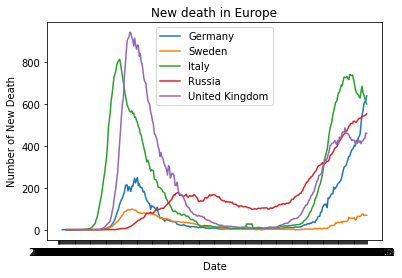

In [51]:
countries = ["Germany","Sweden","Italy","Russia","United Kingdom"]
for i in countries:
    plt.plot(newData[newData['location']== i]['date'],newData[newData['location']== i]['new_deaths_smoothed'])

plt.legend(countries)
plt.xlabel('Date')
plt.ylabel('Number of New Death')
plt.title('New death in Europe')

Text(0.5, 1.0, 'New death in Asia')

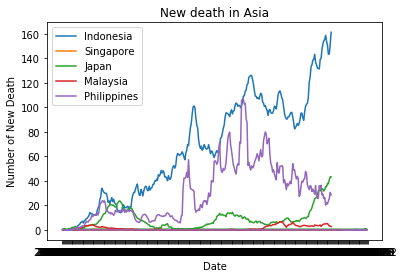

In [66]:
countries = ["Indonesia","Singapore","Japan","Malaysia","Philippines"]
for i in countries:
    plt.plot(newData[newData['location']== i]['date'],newData[newData['location']== i]['new_deaths_smoothed'])

plt.legend(countries)
plt.xlabel('Date')
plt.ylabel('Number of New Death')
plt.title('New death in Asia')

for i in newData['location'].value_counts().index:
    y_axis = newData[newData['location']== i]['new_deaths_smoothed']
    x_axis = newData[newData['location']== i]['stringency_index']
    plt.scatter(x_axis,y_axis,color=colors[random.randrange(0,len(colors)-1)])
    plt.title("Correlation of "+ "the number of death and the Stringency Index in "+i)
    plt.ylabel('New Deaths')
    plt.xlabel('Stringency Index')
    plt.show()

In [ ]:
for i in newData['continent'].value_counts().index:
    population = newData[newData['continent'] == i]['population'].value_counts().index
    tick_label = newData[newData['continent'] == i]['location'].value_counts().index
    x_coordinate = np.arange(1,len(tick_label)+1)
    ax = sns.barplot(population, tick_label)
    ax.set_title("Barplot of population in "+ j +" continent")
    ax.set_xlabel("Population")
    ax.set_ylabel("Location")
    plt.show()

In [ ]:
for i in newData['location'].value_counts().index:
    y_axis = newData[newData['location']== i]['new_deaths_smoothed']
    x_axis = newData[newData['location']== i]['tests_per_case']
    plt.scatter(x_axis,y_axis,color=colors[random.randrange(0,len(colors)-1)])
    plt.title("Correlation of "+ "the number of death and the number of Test per case "+i)
    plt.ylabel('New Deaths')
    plt.xlabel('Test per case')
    plt.show()

In [ ]:
pd.pivot_table(training, index = 'continent', columns = 'location', values = 'id' ,aggfunc ='count')

In [ ]:
pd.pivot_table(training, index = 'continent', columns = 'new_deaths', values = 'id' ,aggfunc ='count')

In [ ]:
extremePoverty_newDeaths_corr = newData[['extreme_poverty','new_deaths_smoothed']]
extremePoverty_newDeaths_corr.dropna(subset=['extreme_poverty'],inplace = True)

In [ ]:
sns.scatterplot(data=extremePoverty_newDeaths_corr ,x = 'extreme_poverty' , y = 'new_deaths_smoothed',hue="extreme_poverty",marker="+")

In [ ]:
pd.set_option('max_rows',None)
pd.pivot_table(newData, index = 'location', values = ['population','new_deaths','handwashing_facilities','stringency_index','extreme_poverty','handwashing_facilities','tests_per_case','gdp_per_capita'])

In [ ]:
newData.columns

### Feature Engineering

In [68]:
newData['date_to_integer'] = newData['date'].apply(lambda x : float(''.join(x.split('-'))) if str(x) else x)

### Data Preprocessing

In [69]:
newData['continent'] = newData['continent'].apply(lambda x : "World" if pd.isna(x) else x )

In [70]:
hdi_continent_mean = dict()
hdi_location_mean = dict()
gdp_location_mean = dict()

for i in (newData['continent'].value_counts().index):
    hdi_continent_mean[i] = newData[newData['continent'] == i]['human_development_index'].mean()

for i in newData['location'].value_counts().index:
    hdi_location_mean[i] = newData[newData['location'] == i]['human_development_index'].mean()

for key,value in hdi_location_mean.items():
    if pd.isna(value):
        hdi_location_mean[key]= hdi_continent_mean[newData[newData['location']==key]['continent'].values[0]] 
        
for i in newData['location'].value_counts().index:
    if pd.isna(newData[newData['location']==i]['gdp_per_capita'].values[0]):
        gdp_location_mean[i] = newData[newData['continent'] == newData[newData['location']==i]['continent'].values[0]]['gdp_per_capita'].mean()
    else:
        gdp_location_mean[i] = newData[newData['location']==i]['gdp_per_capita'].mean()
        
hdi_location_mean.pop('World')
hdi_continent_mean.pop('World')
hdi_location_mean['World'] = sum(hdi_location_mean.values())/len(hdi_location_mean)
hdi_continent_mean['World'] = sum(hdi_continent_mean.values())/len(hdi_continent_mean)

In [71]:
newData['human_development_index'] = newData['location'].apply(lambda x:  hdi_location_mean[x])  
newData['gdp_per_capita'] = newData['location'].apply(lambda x:  gdp_location_mean[x])
newData['total_cases'] = newData['total_cases'].apply(lambda x: 0 if pd.isna(x) else x)
newData['total_deaths'] = newData['total_deaths'].apply(lambda x: 0 if pd.isna(x) else x)
newData['new_deaths'] = newData['new_deaths'].apply(lambda x: 0 if pd.isna(x) else x)
newData['new_cases'] = newData['new_cases'].apply(lambda x: 0 if pd.isna(x) else x)
newData['new_cases_smoothed'] = newData['new_cases_smoothed'].apply(lambda x: 0 if pd.isna(x) else x)
newData['new_deaths_smoothed'] = newData['new_deaths_smoothed'].apply(lambda x: 0 if pd.isna(x) else x)
newData['total_cases_per_million'] = newData['total_cases_per_million'].apply(lambda x: 0 if pd.isna(x) else x)
newData['total_deaths_per_million'] = newData['total_deaths_per_million'].apply(lambda x: 0 if pd.isna(x) else x)
newData['new_cases_per_million'] = newData['new_cases_per_million'].apply(lambda x: 0 if pd.isna(x) else x)
newData['new_deaths_per_million'] = newData['new_deaths_per_million'].apply(lambda x: 0 if pd.isna(x) else x)
newData['new_cases_smoothed_per_million'] = newData['new_cases_smoothed_per_million'].apply(lambda x: 0 if pd.isna(x) else x)
newData['new_deaths_smoothed_per_million'] = newData['new_deaths_smoothed_per_million'].apply(lambda x: 0 if pd.isna(x) else x)
newData['total_tests'] = newData['total_tests'].apply(lambda x: 0 if pd.isna(x) else x)
newData['new_tests'] = newData['new_tests'].apply(lambda x: 0 if pd.isna(x) else x)
newData['total_tests_per_thousand'] = newData['total_tests_per_thousand'].apply(lambda x: 0 if pd.isna(x) else x)
newData['new_tests_per_thousand'] = newData['new_tests_per_thousand'].apply(lambda x: 0 if pd.isna(x) else x)
newData['new_tests_smoothed'] = newData['new_tests_smoothed'].apply(lambda x: 0 if pd.isna(x) else x)
newData['new_tests_smoothed_per_thousand'] = newData['new_tests_smoothed_per_thousand'].apply(lambda x: 0 if pd.isna(x) else x)
newData['tests_per_case'] = newData['tests_per_case'].apply(lambda x: 0 if pd.isna(x) else x) 

In [72]:
diabetes_prevalence_location = dict()
cardiovasc_death_rate_location = dict()
median_age_location = dict()
handwashing_facilities_location = dict()
hospital_beds_per_thousand_location = dict()
life_expectancy_location = dict()
stringency_index_location = dict()
extreme_poverty_location = dict()

for i in newData['location'].value_counts().index:
    diabetes_prevalence_location[i] = newData[newData['location']==i]['diabetes_prevalence'].values[0]
    cardiovasc_death_rate_location[i] = newData[newData['location']==i]['cardiovasc_death_rate'].values[0]
    median_age_location[i] = newData[newData['location']==i]['median_age'].values[0]
    handwashing_facilities_location[i] = newData[newData['location']==i]['handwashing_facilities'].values[0]
    hospital_beds_per_thousand_location[i] = newData[newData['location']==i]['hospital_beds_per_thousand'].values[0]
    life_expectancy_location[i] = newData[newData['location']==i]['life_expectancy'].values[0]
    stringency_index_location[i] = newData[newData['location']==i]['stringency_index'].values[0]
    extreme_poverty_location[i] = newData[newData['location']==i]['extreme_poverty'].values[0]
    
    if pd.isna(newData[newData['location']==i]['diabetes_prevalence'].values[0]):
        diabetes_prevalence_location[i] = newData[newData['continent'] == newData[newData['location']==i]['continent'].values[0]]['diabetes_prevalence'].median()
    if pd.isna(newData[newData['location']==i]['cardiovasc_death_rate'].values[0]):
        cardiovasc_death_rate_location[i] = newData[newData['continent'] == newData[newData['location']==i]['continent'].values[0]]['cardiovasc_death_rate'].median()
    if pd.isna(newData[newData['location']==i]['median_age'].values[0]):
        median_age_location[i] = newData[newData['continent'] == newData[newData['location']==i]['continent'].values[0]]['median_age'].median() 
    if pd.isna(newData[newData['location']==i]['handwashing_facilities'].values[0]):
        handwashing_facilities_location[i] = newData[newData['continent'] == newData[newData['location']==i]['continent'].values[0]]['handwashing_facilities'].mean() #mean
    if pd.isna(newData[newData['location']==i]['hospital_beds_per_thousand'].values[0]):
        hospital_beds_per_thousand_location[i] = newData[newData['continent'] == newData[newData['location']==i]['continent'].values[0]]['hospital_beds_per_thousand'].mean() #mean
    if pd.isna(newData[newData['location']==i]['life_expectancy'].values[0]):
        life_expectancy_location[i] = newData[newData['continent'] == newData[newData['location']==i]['continent'].values[0]]['life_expectancy'].median()
    if pd.isna(newData[newData['location']==i]['stringency_index'].values[0]):
        stringency_index_location[i] = newData[newData['continent'] == newData[newData['location']==i]['continent'].values[0]]['stringency_index'].mean() #mean
    if pd.isna(newData[newData['location']==i]['extreme_poverty'].values[0]):
        extreme_poverty_location[i] = newData[newData['continent'] == newData[newData['location']==i]['continent'].values[0]]['extreme_poverty'].mean() #mean

stringency_index_location.pop('World')
stringency_index_location['World'] = sum(stringency_index_location.values())/len(stringency_index_location)

In [73]:
newData['diabetes_prevalence'] = newData['location'].apply(lambda x:  diabetes_prevalence_location[x])  
newData['cardiovasc_death_rate'] = newData['location'].apply(lambda x:  cardiovasc_death_rate_location[x])  
newData['median_age'] = newData['location'].apply(lambda x:  median_age_location[x])  
newData['handwashing_facilities'] = newData['location'].apply(lambda x:  handwashing_facilities_location[x])  
newData['hospital_beds_per_thousand'] = newData['location'].apply(lambda x:  hospital_beds_per_thousand_location[x])  
newData['life_expectancy'] = newData['location'].apply(lambda x:  life_expectancy_location[x])  
newData['stringency_index'] = newData['location'].apply(lambda x:  stringency_index_location[x])  
newData['extreme_poverty'] = newData['location'].apply(lambda x:  extreme_poverty_location[x])
newData['stringency_index'] = newData['location'].apply(lambda x:  stringency_index_location[x])

In [74]:
newData.drop(newData[newData['new_deaths_smoothed'] < 0].index, inplace = True) 
newData.drop(newData[newData['new_tests'] < 0].index, inplace = True)

In [75]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55086 entries, 32225 to 42307
Data columns (total 37 columns):
id                                 55086 non-null int64
iso_code                           55086 non-null object
continent                          55086 non-null object
location                           55086 non-null object
population                         55086 non-null float64
human_development_index            55086 non-null float64
gdp_per_capita                     55086 non-null float64
date                               55086 non-null object
total_cases                        55086 non-null float64
total_deaths                       55086 non-null float64
new_cases                          55086 non-null float64
new_deaths                         55086 non-null float64
new_cases_smoothed                 55086 non-null float64
new_deaths_smoothed                55086 non-null float64
total_cases_per_million            55086 non-null float64
total_deaths_per_millio

In [76]:
pd.pivot_table(newData, index = 'location', values = ['population','new_deaths','handwashing_facilities','stringency_index','extreme_poverty','handwashing_facilities','tests_per_case','gdp_per_capita'])

,extreme_poverty,gdp_per_capita,handwashing_facilities,handwashing_facilities,new_deaths,population,stringency_index,tests_per_case
location,,,,,,,,
Afghanistan,5.549810,1803.987000,37.74600,37.74600,6.894040,3.892834e+07,8.330000,0.000000
Albania,1.100000,11803.431000,94.01194,94.01194,3.812500,2.877800e+06,36.110000,0.000000
Algeria,0.500000,13913.839000,83.74100,83.74100,8.887043,4.385104e+07,0.000000,0.000000
Andorra,0.897738,33715.425151,94.01194,94.01194,0.274576,7.726500e+04,0.000000,0.000000
Angola,33.545609,5819.495000,26.66400,26.66400,1.407942,3.286627e+07,11.110000,0.000000
...,...,...,...,...,...,...,...,...
Vietnam,2.000000,6171.884000,85.84700,85.84700,0.104790,9.733858e+07,0.000000,1840.669760
World,10.000000,15469.207000,60.13000,60.13000,5082.325373,7.794799e+09,22.122585,0.000000
Yemen,18.800000,1479.147000,49.54200,49.54200,2.606426,2.982597e+07,40.740000,0.000000


In [77]:
all_dummies = pd.get_dummies(newData[['location','date_to_integer','train_data','population', 'human_development_index', 'gdp_per_capita',
       'total_cases', 'total_deaths', 'new_cases',
       'new_cases_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'diabetes_prevalence',
       'cardiovasc_death_rate', 'median_age', 'handwashing_facilities',
       'hospital_beds_per_thousand', 'life_expectancy', 'stringency_index',
       'total_tests', 'new_tests', 'total_tests_per_thousand',
       'new_tests_per_thousand', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'tests_per_case', 'extreme_poverty']])

X_train = all_dummies[all_dummies['train_data']==1].drop(['train_data'],axis=1).drop(['total_deaths'],axis=1)
X_test = all_dummies[all_dummies['train_data']==0].drop(['train_data'],axis=1).drop(['total_deaths'],axis=1)

Y_train = newData[newData['train_data']==1]['total_deaths']
Y_test = newData[newData['train_data']==0]['total_deaths']
# Y_train = Y_train.astype('int')
# Y_test = Y_test.astype('int')
X_train.shape

(43982, 216)

In [22]:
## Scale the data for our model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['date_to_integer','train_data','population', 'human_development_index', 'gdp_per_capita',
       'total_cases', 'total_deaths', 'new_cases',
       'new_cases_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'diabetes_prevalence',
       'cardiovasc_death_rate', 'median_age', 'handwashing_facilities',
       'hospital_beds_per_thousand', 'life_expectancy', 'stringency_index',
       'total_tests', 'new_tests', 'total_tests_per_thousand',
       'new_tests_per_thousand', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'tests_per_case', 'extreme_poverty']]= scale.fit_transform(all_dummies_scaled[['date_to_integer','train_data','population', 'human_development_index', 'gdp_per_capita',
       'total_cases', 'total_deaths', 'new_cases',
       'new_cases_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'diabetes_prevalence',
       'cardiovasc_death_rate', 'median_age', 'handwashing_facilities',
       'hospital_beds_per_thousand', 'life_expectancy', 'stringency_index',
       'total_tests', 'new_tests', 'total_tests_per_thousand',
       'new_tests_per_thousand', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'tests_per_case', 'extreme_poverty']])

X_train_scaled = all_dummies_scaled[all_dummies_scaled['train_data'] == 1].drop(['train_data'],axis=1).drop(['total_deaths'],axis=1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled['train_data'] == 0].drop(['train_data'],axis=1).drop(['total_deaths'],axis=1)

Y_train_scaled = all_dummies_scaled[all_dummies_scaled['train_data']==1]['total_deaths']
Y_test_scaled = all_dummies_scaled[all_dummies_scaled['train_data']==0]['total_deaths']
Y_train_scaled = Y_train_scaled.astype('int')
Y_test_scaled = Y_test_scaled.astype('int')

In [91]:
## Data Modification

all_dummies = pd.get_dummies(newData[['location','date_to_integer','train_data','population', 'human_development_index', 'gdp_per_capita',
       'total_cases', 'total_deaths',
       'new_cases_smoothed', 'diabetes_prevalence',
       'cardiovasc_death_rate', 'median_age', 'handwashing_facilities',
       'hospital_beds_per_thousand', 'life_expectancy', 'stringency_index',
       'total_tests','new_tests_smoothed', 'extreme_poverty']])
                
X_train = all_dummies[all_dummies['train_data']==1].drop(['train_data'],axis=1).drop(['total_deaths'],axis=1)
X_test = all_dummies[all_dummies['train_data']==0].drop(['train_data'],axis=1).drop(['total_deaths'],axis=1)

Y_train = newData[newData['train_data']==1]['total_deaths']
Y_test = newData[newData['train_data']==0]['total_deaths']
# Y_train = Y_train.astype('int')
# Y_test = Y_test.astype('int')
X_train.shape

(43982, 207)

In [92]:
Indonesia_dummies = all_dummies[all_dummies['location_Indonesia']==1]

X_Indonesia = Indonesia_dummies.drop(['train_data'],axis=1).drop(['total_deaths'],axis=1)
Y_Indonesia = newData[newData['location']=='Indonesia']['total_deaths']

X_train_Indonesia = Indonesia_dummies[Indonesia_dummies['train_data']==1].drop(['train_data'],axis=1).drop(['total_deaths'],axis=1)
X_test_Indonesia = Indonesia_dummies[Indonesia_dummies['train_data']==0].drop(['train_data'],axis=1).drop(['total_deaths'],axis=1)

Y_train_Indonesia = newData[newData['train_data']==1][newData[newData['train_data']==1]["location"]=="Indonesia"]['total_deaths']
Y_test_Indonesia = newData[newData['train_data']==0][newData[newData['train_data']==0]["location"]=="Indonesia"]['total_deaths']

X_test_Indonesia.shape

(59, 207)

In [25]:
X_train_Indonesia

,date_to_integer,population,human_development_index,gdp_per_capita,total_cases,new_cases_smoothed,diabetes_prevalence,cardiovasc_death_rate,median_age,handwashing_facilities,...,location_Uruguay,location_Uzbekistan,location_Vanuatu,location_Vatican,location_Venezuela,location_Vietnam,location_World,location_Yemen,location_Zambia,location_Zimbabwe
22749,20200302.0,273523621.0,0.694,11188.744,2.0,0.000,6.32,342.864,29.3,64.204,...,0,0,0,0,0,0,0,0,0,0
22750,20200303.0,273523621.0,0.694,11188.744,2.0,0.000,6.32,342.864,29.3,64.204,...,0,0,0,0,0,0,0,0,0,0
22751,20200304.0,273523621.0,0.694,11188.744,2.0,0.000,6.32,342.864,29.3,64.204,...,0,0,0,0,0,0,0,0,0,0
22752,20200305.0,273523621.0,0.694,11188.744,2.0,0.000,6.32,342.864,29.3,64.204,...,0,0,0,0,0,0,0,0,0,0
22753,20200306.0,273523621.0,0.694,11188.744,4.0,0.000,6.32,342.864,29.3,64.204,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22980,20201019.0,273523621.0,0.694,11188.744,365240.0,4074.857,6.32,342.864,29.3,64.204,...,0,0,0,0,0,0,0,0,0,0
22981,20201020.0,273523621.0,0.694,11188.744,368842.0,4031.429,6.32,342.864,29.3,64.204,...,0,0,0,0,0,0,0,0,0,0
22982,20201021.0,273523621.0,0.694,11188.744,373109.0,4051.429,6.32,342.864,29.3,64.204,...,0,0,0,0,0,0,0,0,0,0
22983,20201022.0,273523621.0,0.694,11188.744,377541.0,4054.429,6.32,342.864,29.3,64.204,...,0,0,0,0,0,0,0,0,0,0


## Saving Indonesia's dataset

In [204]:
newData[newData["location"]=="Indonesia"].to_csv('Indonesia.csv',index=False)

In [230]:
train

,id,iso_code,continent,location,population,human_development_index,gdp_per_capita,date,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,total_cases_per_million,total_deaths_per_million,new_cases_per_million,new_deaths_per_million,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,diabetes_prevalence,cardiovasc_death_rate,median_age,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,stringency_index,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,extreme_poverty,train_data,date_to_integer
182,22932,IDN,Asia,Indonesia,273523621.0,0.694,11188.744,2020-08-31,174796.0,7417.0,2743.0,74.0,2769.143,94.000,639.053,27.116,10.028,0.271,10.124,0.344,6.32,342.864,29.3,64.204,1.04,71.72,28.7,1282618.0,11317.0,4.689,0.041,15230.0,0.056,5.5,5.7,1,20200831.0
66,22816,IDN,Asia,Indonesia,273523621.0,0.694,11188.744,2020-05-07,12776.0,930.0,338.0,35.0,379.714,19.714,46.709,3.400,1.236,0.128,1.388,0.072,6.32,342.864,29.3,64.204,1.04,71.72,28.7,96717.0,3741.0,0.354,0.014,3481.0,0.013,9.2,5.7,1,20200507.0
49,22799,IDN,Asia,Indonesia,273523621.0,0.694,11188.744,2020-04-20,6760.0,590.0,185.0,8.0,314.714,27.286,24.715,2.157,0.676,0.029,1.151,0.100,6.32,342.864,29.3,64.204,1.04,71.72,28.7,43749.0,1530.0,0.160,0.006,2337.0,0.009,7.4,5.7,1,20200420.0
165,22915,IDN,Asia,Indonesia,273523621.0,0.694,11188.744,2020-08-14,135123.0,6021.0,2307.0,53.0,1985.286,61.143,494.009,22.013,8.434,0.194,7.258,0.224,6.32,342.864,29.3,64.204,1.04,71.72,28.7,1039682.0,12728.0,3.801,0.047,12539.0,0.046,6.3,5.7,1,20200814.0
219,22969,IDN,Asia,Indonesia,273523621.0,0.694,11188.744,2020-10-07,315714.0,11472.0,4538.0,98.0,4100.857,104.571,1154.248,41.942,16.591,0.358,14.993,0.382,6.32,342.864,29.3,64.204,1.04,71.72,28.7,2177675.0,32167.0,7.962,0.118,26283.0,0.096,6.4,5.7,1,20201007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,22855,IDN,Asia,Indonesia,273523621.0,0.694,11188.744,2020-06-15,39294.0,2198.0,1017.0,64.0,1037.286,45.000,143.659,8.036,3.718,0.234,3.792,0.165,6.32,342.864,29.3,64.204,1.04,71.72,28.7,329190.0,0.0,1.204,0.000,7823.0,0.029,7.5,5.7,1,20200615.0
99,22849,IDN,Asia,Indonesia,273523621.0,0.694,11188.744,2020-06-09,33076.0,1923.0,1043.0,40.0,789.571,37.143,120.926,7.030,3.813,0.146,2.887,0.136,6.32,342.864,29.3,64.204,1.04,71.72,28.7,281653.0,7223.0,1.030,0.026,6244.0,0.023,7.9,5.7,1,20200609.0
222,22972,IDN,Asia,Indonesia,273523621.0,0.694,11188.744,2020-10-10,328952.0,11765.0,4294.0,88.0,4206.571,101.429,1202.646,43.013,15.699,0.322,15.379,0.371,6.32,342.864,29.3,64.204,1.04,71.72,28.7,2283369.0,33675.0,8.348,0.123,29952.0,0.110,7.1,5.7,1,20201010.0
218,22968,IDN,Asia,Indonesia,273523621.0,0.694,11188.744,2020-10-06,311176.0,11374.0,4056.0,121.0,4064.571,110.429,1137.657,41.583,14.829,0.442,14.860,0.404,6.32,342.864,29.3,64.204,1.04,71.72,28.7,2145508.0,26153.0,7.844,0.096,26108.0,0.095,6.4,5.7,1,20201006.0


## Model Building

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [150]:
linear = LinearRegression()

linear.fit(X_train_Indonesia,Y_train_Indonesia)
y_pred_linear = linear.predict(X_test_Indonesia)

print("Variance Score:",explained_variance_score(Y_test_Indonesia, y_pred_linear, multioutput='uniform_average'))
print("Mean Squared Error Score:",mean_squared_error(Y_test_Indonesia, y_pred_linear))

Variance Score: 0.773780538893718
Mean Squared Error Score: 1519223.3220338982


In [151]:
gradient = GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

gradient.fit(X_train_Indonesia,Y_train_Indonesia)
y_pred_gradient = gradient.predict(X_test_Indonesia)

print("Variance Score:",explained_variance_score(Y_test_Indonesia, y_pred_gradient, multioutput='uniform_average'))
print("Mean Squared Error Score:",mean_squared_error(Y_test_Indonesia, y_pred_gradient))

Variance Score: -0.24539331454808377
Mean Squared Error Score: 17340238.549758904


In [152]:
ridge = Ridge()

ridge.fit(X_train_Indonesia,Y_train_Indonesia)
y_pred_ridge = ridge.predict(X_test_Indonesia)

print("Variance Score:",explained_variance_score(Y_test_Indonesia, y_pred_ridge, multioutput='uniform_average'))
print("Mean Squared Error Score:",mean_squared_error(Y_test_Indonesia, y_pred_ridge))

Variance Score: 0.796135768275398
Mean Squared Error Score: 1750438.828369588


In [153]:
lasso = Lasso()

lasso.fit(X_train_Indonesia,Y_train_Indonesia)
y_pred_lasso = lasso.predict(X_test_Indonesia)

print("Variance Score:",explained_variance_score(Y_test_Indonesia, y_pred_lasso, multioutput='uniform_average'))
print("Mean Squared Error Score:",mean_squared_error(Y_test_Indonesia, y_pred_lasso))

Variance Score: 0.7961319718396231
Mean Squared Error Score: 1750439.2192206348


## Model Evaluation (Without Tuning)

### Linear Regression
Variance Score:  0.773780538893718

Mean Squared Error Score: 1519223.3220338982

### Gradient Boosting Regression
Variance Score: -0.18508654333350827

Mean Squared Error Score: 18376429.36144361

### Ridge Regression
Variance Score: 0.796135768275398

Mean Squared Error Score: 1750438.828369588

### Lasso Regression
Variance Score: 0.7961319718396231

Mean Squared Error Score: 1750439.2192206348

## Model Saving (Without Tuning)

In [154]:
pickle.dump(linear, open('models/linear_model', 'wb'))
pickle.dump(gradient, open('models/gradient_model', 'wb'))
pickle.dump(ridge, open('models/ridge_model', 'wb'))
pickle.dump(lasso, open('models/lasso_model', 'wb'))

## Model Loading (Without Tuning)

In [86]:
linear = pickle.load(open('models/linear_model', 'rb'))
gradient = pickle.load(open('models/gradient_model', 'rb'))
ridge = pickle.load(open('models/ridge_model', 'rb'))
lasso = pickle.load(open('models/lasso_model', 'rb'))



## Model Tuning & Evaluation

In [124]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [125]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Parameters: ' + str(classifier.best_params_))

In [126]:
linear = LinearRegression()
param_grid = {'fit_intercept':[True,False],
              'normalize':[True,False],
              'copy_X':[True,False],
}
clf_linear = GridSearchCV(linear, param_grid = param_grid , verbose = True , n_jobs = -1)
best_clf_linear = clf_linear.fit(X_train_Indonesia,Y_train_Indonesia)
clf_performance(best_clf_linear,'Linear Regression')

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Linear Regression
Best Parameters: {'copy_X': True, 'fit_intercept': False, 'normalize': True}


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    3.1s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
gbr = GradientBoostingRegressor()
param_grid = {'n_estimators' : [350,400,450,500],
              'max_depth':[5,10,15,20],
              'min_samples_split' :[2,5,7,10],
              'learning_rate' : [0.1,0.5,1,2],
              'loss' : ['ls','lad','huber','quantile']
}
clf_gbr = GridSearchCV(gbr, param_grid = param_grid, verbose = True , n_jobs = -1)
best_clf_gbr  = clf_gbr.fit(X_train_Indonesia,Y_train_Indonesia)
clf_performance(best_clf_gbr,'Gradient Boost Regression')

In [127]:
ridge = Ridge()
param_grid = {'alpha' : [0.1,0,2,0.5,1,2],
              'fit_intercept':[True,False],
              'normalize' :[True,False],
              'copy_X' : [True,False],
              'max_iter' : [2000],
              'solver':['auto']
}
clf_ridge = GridSearchCV(ridge, param_grid = param_grid, verbose = True ,n_jobs= -1)
best_clf_ridge  = clf_ridge.fit(X_train_Indonesia,Y_train_Indonesia)
clf_performance(best_clf_ridge,'Ridge Regression')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Ridge Regression
Best Parameters: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 2000, 'normalize': False, 'solver': 'auto'}


[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    0.3s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [128]:
lasso = Lasso()
param_grid = {'alpha' : [0.1,0,2,0.5,1,2],
              'fit_intercept':[True,False],
              'normalize' :[True,False],
              'copy_X' : [True,False],
              'max_iter' : [2000],
              'tol':[0.00001,0.0001,0.001,0.01,0.1,1],
              'warm_start':[True,False],
              'positive':[True,False],
              'selection':['cyclic','random'],
}
clf_ridge = GridSearchCV(lasso, param_grid = param_grid, verbose = True ,n_jobs= -1)
best_clf_lasso  = clf_ridge.fit(X_train_Indonesia,Y_train_Indonesia)
clf_performance(best_clf_lasso,'Lasso Regression')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 2304 candidates, totalling 6912 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 3976 tasks      | elapsed:    4.2s


Lasso Regression
Best Parameters: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': False, 'max_iter': 2000, 'normalize': True, 'positive': False, 'selection': 'random', 'tol': 0.01, 'warm_start': True}


[Parallel(n_jobs=-1)]: Done 6912 out of 6912 | elapsed:    6.7s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [129]:
# Tuned Models
tuned_linear = best_clf_linear.best_estimator_
tuned_gradient = best_clf_gbr.best_estimator_
tuned_ridge = best_clf_ridge.best_estimator_
tuned_lasso = best_clf_lasso.best_estimator_

In [130]:
y_pred_tuned_linear = tuned_linear.predict(X_test_Indonesia)
print("Variance Score:",explained_variance_score(Y_test_Indonesia, y_pred_tuned_linear, multioutput='uniform_average'))
print("Mean Squared Error Score:",mean_squared_error(Y_test_Indonesia, y_pred_tuned_linear))

y_pred_tuned_gradient = tuned_gradient.predict(X_test_Indonesia)
print("Variance Score:",explained_variance_score(Y_test_Indonesia, y_pred_tuned_gradient, multioutput='uniform_average'))
print("Mean Squared Error Score:",mean_squared_error(Y_test_Indonesia, y_pred_tuned_gradient))

y_pred_tuned_ridge = tuned_ridge.predict(X_test_Indonesia)
print("Variance Score:",explained_variance_score(Y_test_Indonesia, y_pred_tuned_ridge, multioutput='uniform_average'))
print("Mean Squared Error Score:",mean_squared_error(Y_test_Indonesia, y_pred_tuned_ridge))

y_pred_tuned_lasso = tuned_lasso.predict(X_test_Indonesia)
print("Variance Score:",explained_variance_score(Y_test_Indonesia, y_pred_tuned_lasso, multioutput='uniform_average'))
print("Mean Squared Error Score:",mean_squared_error(Y_test_Indonesia, y_pred_tuned_lasso))

Variance Score: 0.7961359169480435
Mean Squared Error Score: 1750439.1052824352
Variance Score: 0.7961359020840935
Mean Squared Error Score: 1750439.0775071552
Variance Score: 0.8803867632903289
Mean Squared Error Score: 470601.2615777795


## Model Evaluation ( Tuning)

### Linear Regression
Variance Score:  0.7961359169480435

Mean Squared Error Score: 1750439.1052824352

### Gradient Boosting Regression
Variance Score: -0.1045930748798769

Mean Squared Error Score: 17939904.478078306

### Ridge Regression
Variance Score: 0.7961359020840935

Mean Squared Error Score: 1750439.0775071552

### Lasso Regression
Variance Score: 0.88428046108379

Mean Squared Error Score: 1189546.9617549654

## Model Fitting & Saving

In [131]:
tuned_linear.fit(X_train_Indonesia,Y_train_Indonesia)
tuned_gradient.fit(X_train_Indonesia,Y_train_Indonesia)
tuned_ridge.fit(X_train_Indonesia,Y_train_Indonesia)
tuned_lasso.fit(X_train_Indonesia,Y_train_Indonesia)

pickle.dump(tuned_linear, open('models/tuned_linear_model', 'wb'))
pickle.dump(tuned_gradient, open('models/tuned_gradient_model', 'wb'))
pickle.dump(tuned_ridge, open('models/tuned_ridge_model', 'wb'))
pickle.dump(tuned_lasso, open('models/tuned_lasso_model', 'wb'))

## Model Loading & Predictions

In [89]:
tuned_linear = pickle.load(open('models/tuned_linear_model', 'rb'))
tuned_gradient = pickle.load(open('models/tuned_gradient_model', 'rb'))
tuned_ridge = pickle.load(open('models/tuned_ridge_model', 'rb'))
tuned_lasso = pickle.load(open('models/tuned_lasso_model', 'rb'))

In [93]:
linear_prediction = linear.predict(X_test_Indonesia).astype(int)
gradient_prediction = gradient.predict(X_test_Indonesia).astype(int)
lasso_prediction = lasso.predict(X_test_Indonesia).astype(int)
ridge_prediction = ridge.predict(X_test_Indonesia).astype(int)

tuned_linear_prediction = tuned_linear.predict(X_test_Indonesia).astype(int)
tuned_gradient_prediction = tuned_gradient.predict(X_test_Indonesia).astype(int)
tuned_lasso_prediction = tuned_lasso.predict(X_test_Indonesia).astype(int)
tuned_ridge_prediction = tuned_ridge.predict(X_test_Indonesia).astype(int)

In [94]:
result_comparison = {'ID':testing[testing["location"]=="Indonesia"]['id'],'tuned_linear':tuned_linear_prediction,'tuned_gradient':tuned_gradient_prediction,'tuned_lasso':tuned_lasso_prediction,'tuned_ridge':tuned_ridge_prediction,'linear':linear_prediction,'gradient':gradient_prediction,'lasso':lasso_prediction,'ridge':ridge_prediction,'Actual':Y_test_Indonesia}
# result_comparison = {'ID':testing[testing["location"]=="Indonesia"]['id'],'tuned_linear':tuned_linear_prediction,'tuned_lasso':tuned_lasso_prediction,'tuned_ridge':tuned_ridge_prediction,'linear':linear_prediction,'lasso':lasso_prediction,'ridge':ridge_prediction,'Actual':Y_test_Indonesia}
result_comparison = pd.DataFrame(data=result_comparison)

In [97]:
mse_linear = mean_squared_error(Y_test_Indonesia, linear_prediction)
mse_gradient = mean_squared_error(Y_test_Indonesia, gradient_prediction)
mse_ridge = mean_squared_error(Y_test_Indonesia, lasso_prediction)
mse_lasso = mean_squared_error(Y_test_Indonesia, ridge_prediction)

mse_tuned_linear = mean_squared_error(Y_test_Indonesia, tuned_linear_prediction)
mse_tuned_gradient = mean_squared_error(Y_test_Indonesia, tuned_gradient_prediction)
mse_tuned_ridge = mean_squared_error(Y_test_Indonesia, tuned_lasso_prediction)
mse_tuned_lasso = mean_squared_error(Y_test_Indonesia, tuned_ridge_prediction)

print('MSE value difference between Linear Regression and Gradient Boosting Regression :', abs(mse_linear-mse_gradient))
print('MSE value difference between Gradient Boosting Regression and Ridge Regression :', abs(mse_gradient-mse_ridge))
print('MSE value difference between Ridge Regression and Lasso Regression :', abs(mse_ridge-mse_lasso))
print('MSE value difference between Lasso Regression and Linear Regression :', abs(mse_lasso-mse_linear))

print('MSE value difference between Linear Regression and Tuned Linear Regression :', abs(mse_linear-mse_tuned_linear))
print('MSE value difference between Gradient Boosting Regression and Tuned Gradient Boosting Regression :', abs(mse_gradient-mse_tuned_gradient))
print('MSE value difference between Ridge Regression and Tuned Ridge Regression :', abs(mse_ridge-mse_tuned_ridge))
print('MSE value difference between Lasso Regression and Tuned Lasso Regression :', abs(mse_lasso-mse_tuned_lasso))

MSE value difference between Linear Regression and Gradient Boosting Regression : 15823708.305084744
MSE value difference between Gradient Boosting Regression and Ridge Regression : 15593396.576271186
MSE value difference between Ridge Regression and Lasso Regression : 0.0
MSE value difference between Lasso Regression and Linear Regression : 230311.72881355952
MSE value difference between Linear Regression and Tuned Linear Regression : 230311.72881355952
MSE value difference between Gradient Boosting Regression and Tuned Gradient Boosting Regression : 600287.2711864412
MSE value difference between Ridge Regression and Tuned Ridge Regression : 1262605.2881355933
MSE value difference between Lasso Regression and Tuned Lasso Regression : 0.0


## Indonesia's Evaluation & Visualization

In [98]:
X_train_Indonesia.columns

Index(['date_to_integer', 'population', 'human_development_index',
       'gdp_per_capita', 'total_cases', 'new_cases_smoothed',
       'diabetes_prevalence', 'cardiovasc_death_rate', 'median_age',
       'handwashing_facilities',
       ...
       'location_Uruguay', 'location_Uzbekistan', 'location_Vanuatu',
       'location_Vatican', 'location_Venezuela', 'location_Vietnam',
       'location_World', 'location_Yemen', 'location_Zambia',
       'location_Zimbabwe'],
      dtype='object', length=207)

In [99]:
X_train_Indonesia['date'] = pd.to_datetime(X_train_Indonesia['date_to_integer'], format='%Y%m%d')

Text(0.5, 1.0, 'Total Death in Indonesia')

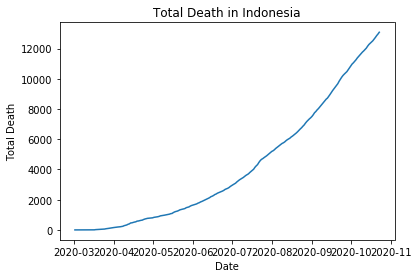

In [100]:
plt.plot(X_train_Indonesia['date'],Y_train_Indonesia)
plt.xlabel("Date")
plt.ylabel("Total Death")
plt.title("Total Death in Indonesia")

In [101]:
X_train_Indonesia = X_train_Indonesia.drop(columns='date')

In [102]:
for i in range(len(result_comparison["Actual"])) :
    if result_comparison["linear"].iloc[i] < result_comparison["linear"].iloc[i-1] and i>0 :
        result_comparison["linear"].iloc[i] =result_comparison["linear"].iloc[i-1]
    if result_comparison["gradient"].iloc[i] < result_comparison["gradient"].iloc[i-1] and i>0 :
        result_comparison["gradient"].iloc[i] =result_comparison["gradient"].iloc[i-1]
    if result_comparison["ridge"].iloc[i] < result_comparison["ridge"].iloc[i-1] and i>0 :
        result_comparison["ridge"].iloc[i] =result_comparison["ridge"].iloc[i-1]
    if result_comparison["lasso"].iloc[i] < result_comparison["lasso"].iloc[i-1] and i>0 :
        result_comparison["lasso"].iloc[i] =result_comparison["lasso"].iloc[i-1]
    if result_comparison["tuned_linear"].iloc[i] < result_comparison["tuned_linear"].iloc[i-1] and i>0 :
        result_comparison["tuned_linear"].iloc[i] =result_comparison["tuned_linear"].iloc[i-1]
    if result_comparison["tuned_gradient"].iloc[i] < result_comparison["tuned_gradient"].iloc[i-1] and i>0 :
        result_comparison["tuned_gradient"].iloc[i] =result_comparison["tuned_gradient"].iloc[i-1]
    if result_comparison["tuned_ridge"].iloc[i] < result_comparison["tuned_ridge"].iloc[i-1] and i>0 :
        result_comparison["tuned_ridge"].iloc[i] =result_comparison["tuned_ridge"].iloc[i-1]
    if result_comparison["tuned_lasso"].iloc[i] < result_comparison["tuned_lasso"].iloc[i-1] and i>0 :
        result_comparison["tuned_lasso"].iloc[i] =result_comparison["tuned_lasso"].iloc[i-1]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [103]:
X_test_Indonesia['date'] = pd.to_datetime(X_test_Indonesia['date_to_integer'], format='%Y%m%d')

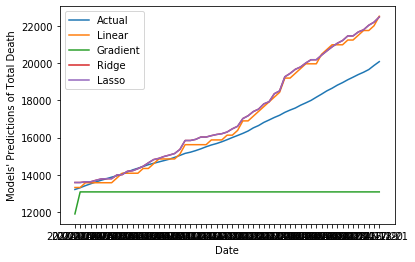

In [104]:
plt.plot(testing[testing["location"]=="Indonesia"]["date"],result_comparison["Actual"])
plt.plot(testing[testing["location"]=="Indonesia"]["date"],result_comparison["linear"])
plt.plot(testing[testing["location"]=="Indonesia"]["date"],result_comparison["gradient"])
plt.plot(testing[testing["location"]=="Indonesia"]["date"],result_comparison["ridge"])
plt.plot(testing[testing["location"]=="Indonesia"]["date"],result_comparison["lasso"])
plt.xlabel("Date")
plt.ylabel("Models' Predictions of Total Death")
plt.legend(["Actual","Linear","Gradient","Ridge","Lasso"])

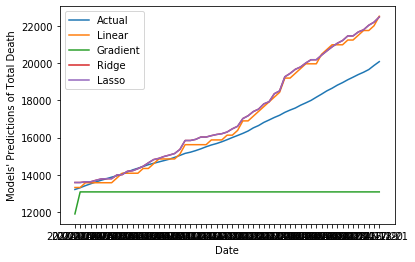

In [105]:
plt.plot(testing[testing["location"]=="Indonesia"]["date"],result_comparison["Actual"])
plt.plot(testing[testing["location"]=="Indonesia"]["date"],result_comparison["linear"])
plt.plot(testing[testing["location"]=="Indonesia"]["date"],result_comparison["gradient"])
plt.plot(testing[testing["location"]=="Indonesia"]["date"],result_comparison["ridge"])
plt.plot(testing[testing["location"]=="Indonesia"]["date"],result_comparison["lasso"])
plt.xlabel("Date")
plt.ylabel("Models' Predictions of Total Death")
plt.legend(["Actual","Linear","Gradient","Ridge","Lasso"])

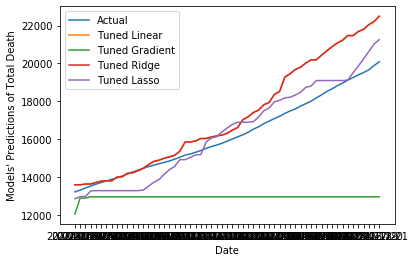

In [106]:
plt.plot(testing[testing["location"]=="Indonesia"]["date"],result_comparison["Actual"])
plt.plot(testing[testing["location"]=="Indonesia"]["date"],result_comparison["tuned_linear"])
plt.plot(testing[testing["location"]=="Indonesia"]["date"],result_comparison["tuned_gradient"])
plt.plot(testing[testing["location"]=="Indonesia"]["date"],result_comparison["tuned_ridge"])
plt.plot(testing[testing["location"]=="Indonesia"]["date"],result_comparison["tuned_lasso"])
plt.xlabel("Date")
plt.ylabel("Models' Predictions of Total Death")
plt.legend(["Actual","Tuned Linear","Tuned Gradient","Tuned Ridge","Tuned Lasso"])

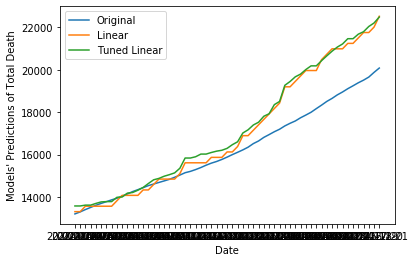

In [107]:
plt.plot(testing[testing["location"]=="Indonesia"]["date"],result_comparison["Actual"])
plt.plot(testing[testing["location"]=="Indonesia"]["date"],result_comparison["linear"])
plt.plot(testing[testing["location"]=="Indonesia"]["date"],result_comparison["tuned_linear"])
plt.xlabel("Date")
plt.ylabel("Models' Predictions of Total Death")
plt.legend(["Original","Linear","Tuned Linear"])

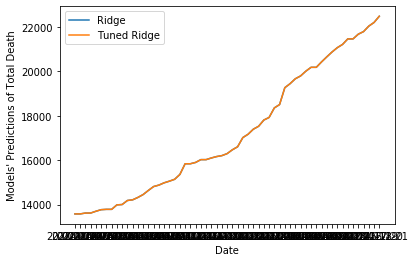

In [108]:
plt.plot(testing[testing["location"]=="Indonesia"]["date"],result_comparison["ridge"])
plt.plot(testing[testing["location"]=="Indonesia"]["date"],result_comparison["tuned_ridge"])
plt.xlabel("Date")
plt.ylabel("Models' Predictions of Total Death")
plt.legend(["Ridge","Tuned Ridge"])

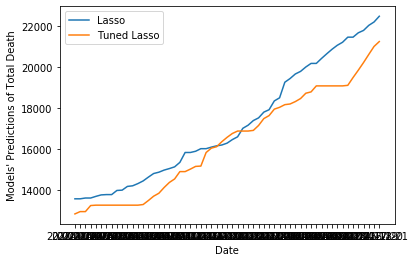

In [109]:
plt.plot(testing[testing["location"]=="Indonesia"]["date"],result_comparison["lasso"])
plt.plot(testing[testing["location"]=="Indonesia"]["date"],result_comparison["tuned_lasso"])
plt.xlabel("Date")
plt.ylabel("Models' Predictions of Total Death")
plt.legend(["Lasso","Tuned Lasso"])

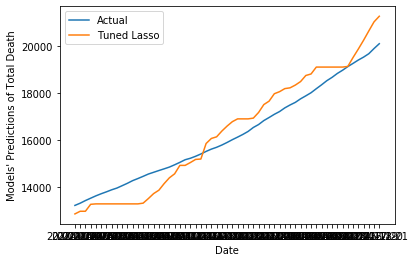

In [110]:
plt.plot(testing[testing["location"]=="Indonesia"]["date"],result_comparison["Actual"])
plt.plot(testing[testing["location"]=="Indonesia"]["date"],result_comparison["tuned_lasso"])
plt.xlabel("Date")
plt.ylabel("Models' Predictions of Total Death")
plt.legend(["Actual","Tuned Lasso"])